<a href="https://colab.research.google.com/github/didesnis/colab/blob/master/Otomoto_skelbimu_analize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Įkeliam bibliotekas kurių prireiks šiam projektui

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nuskaitome projekto failą

In [ ]:
auto = pd.read_excel("otomoto_adjusted.xls")

# Pakoreguojam tuščius įrašus užpildydami juos "Not available" informacija

In [ ]:
auto = auto.fillna(value={"drive_type": 'Not available', "no_accident": 'Not available', "serviced_at_aso": 'Not available', "date_of_first_registration_in_vehicle_history": 'Not available',"leasing":'Not available',"vat":'Not available',"manufacturer's_warranty_period":'Not available',"damaged":'Not available',"first_owner_from_new":'Not available',"fuel_consumption_in_city":'Not available',"show_offers_with_vin_number":'Not available'})
auto

,id,offer_creation_date,offer_title,price,currency,seller_type,seller_registration_year,location,offer_from,show_offers_with_vin_number,...,fuel_consumption_in_city,drive_type,first_owner_from_new,no_accident,serviced_at_aso,date_of_first_registration_in_vehicle_history,leasing,vat,damaged,manufacturer's_warranty_period
0,6106252111,2023-04-20 14:52:00,Volvo V70,23200,PLN,Dealer,2015,"≈Åu≈ºycka 14B - 72-600 ≈öwinouj≈õcie, Zachodni...",Firmy,Tak,...,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
1,6103725874,2023-04-21 06:44:00,Honda Accord 2.0 Comfort,16800,PLN,Private person,2020,"Inowroc≈Çaw, inowroc≈Çawski, Kujawsko-pomorskie",Osoby prywatnej,Tak,...,10 l/100km,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
2,6109470482,2023-04-15 14:38:00,Mercedes-Benz Klasa X 350 d 4-Matic Power,249900,PLN,Dealer,2007,"OLSZYNY-192 - 32-831 Olszyny, gm. Wojnicz, tar...",Firmy,Tak,...,10 l/100km,4x4 (manually attached),Tak,Tak,Tak,Not available,Not available,Not available,Not available,Not available
3,6108732545,2023-04-13 16:11:00,Toyota Avensis 1.8 VVT-i Sol,16499,PLN,Dealer,2011,"Grodzka 113 - 87-800 W≈Çoc≈Çawek, Kujawsko-pom...",Firmy,Tak,...,9 l/100km,Front wheels,Not available,Tak,Tak,28/01/2006,Not available,Not available,Not available,Not available
4,6108048263,2023-04-17 15:15:00,Ford C-MAX 2.0 TDCi Champions Edition,29900,PLN,Dealer,2013,"Orch√≥w 172A - 98-100 ≈Åask, ≈Çaski, ≈Å√≥dzkie...",Firmy,Tak,...,"6,40 l/100km",Not available,Not available,Not available,Not available,23/04/2012,Not available,Not available,Not available,Not available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,6107147289,2023-04-17 13:21:00,Skoda RAPID 1.0 TSI Ambition,45850,PLN,Dealer,2015,"Obrze≈ºna P√≥≈Çnocna 24 - 41-400 Mys≈Çowice, ≈...",Firmy,Tak,...,Not available,Front wheels,Tak,Not available,Tak,15/04/2019,Not available,Tak,Not available,Not available
65531,6109634604,2023-04-20 09:41:00,Jeep Compass 1.5 T4 mHEV Limited FWD S&S DCT,151000,PLN,Dealer,2016,"Gen.Grota Roweckiego - 41-214 Sosnowiec, ≈ölƒÖ...",Firmy,Not available,...,Not available,Not available,Not available,Tak,Not available,Not available,Tak,Tak,Not available,Not available
65532,6108753483,2023-04-12 13:38:00,Ford Focus 2.0 Ghia,11500,PLN,Private person,2022,"≈Å√≥d≈∫, ≈Å√≥dzkie, ≈ör√≥dmie≈õcie",Osoby prywatnej,Tak,...,9 l/100km,Front wheels,Not available,Not available,Not available,31/03/2005,Not available,Not available,Not available,Not available
65533,6108683238,2023-04-22 21:19:00,Audi A8 4.2 Quattro,32000,PLN,Private person,2016,"Rossosz, bialski, Lubelskie",Osoby prywatnej,Tak,...,17 l/100km,4x4 (fixed),Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available


# Paskaičiuojam kiek įrašų mes analizuosim

In [ ]:
viso_idetu_skelbimu = auto['id'].count()
print('Viso analizuojamų skelbimų šiame projekte:',viso_idetu_skelbimu)

Viso analizuojamų skelbimų šiame projekte: 65535


# Paskaičiuojame ir atvaizduojame pardavėjų grupes

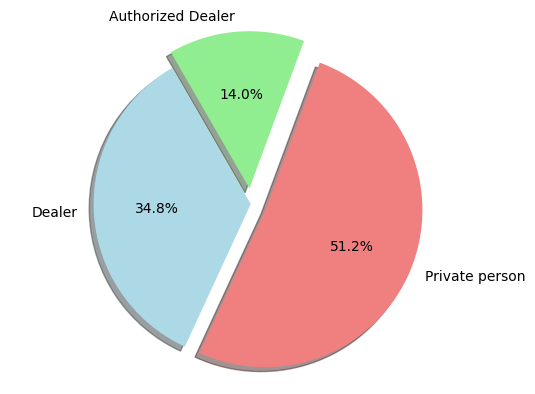

In [ ]:
dealer_kiekis = (auto['seller_type'] == 'Dealer').sum()
dealer_auth_kiekis = (auto['seller_type'] == 'Authorized Dealer').sum()
private_kiekis = (auto['seller_type'] == 'Private person').sum()
suma = dealer_kiekis + private_kiekis + dealer_auth_kiekis

labels = ['Dealer', 'Private person', 'Authorized Dealer']
sizes = [dealer_kiekis, private_kiekis, dealer_auth_kiekis]
colors = ['lightblue', 'lightcoral', 'lightgreen']
explode = (0, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal')

plt.show()

# Pardavimas automobilį lizingu

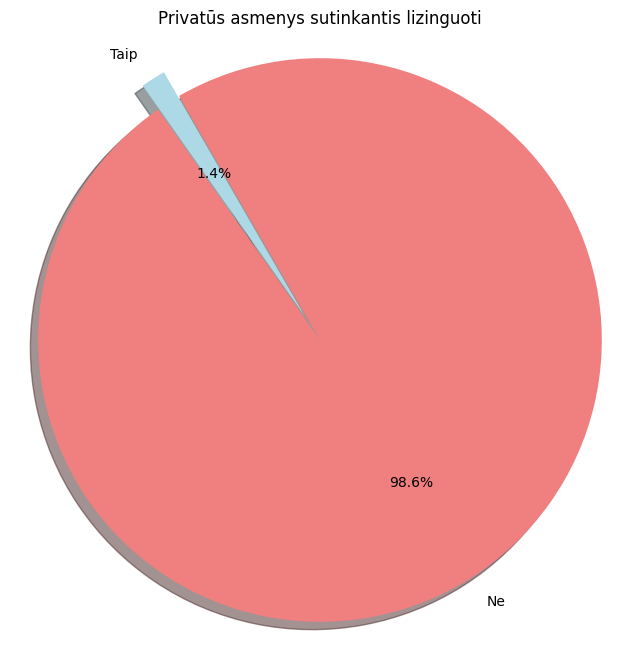

In [ ]:
privatus_lizingas = auto[(auto['seller_type'] == 'Private person') & (auto['leasing'] == 'Tak')]
sk_privatus_lizingas = len(privatus_lizingas)

labels = ['Taip', 'Ne']
sizes = [sk_privatus_lizingas, len(auto) - sk_privatus_lizingas]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal')
plt.title('Privatūs asmenys sutinkantis lizinguoti')

plt.show()


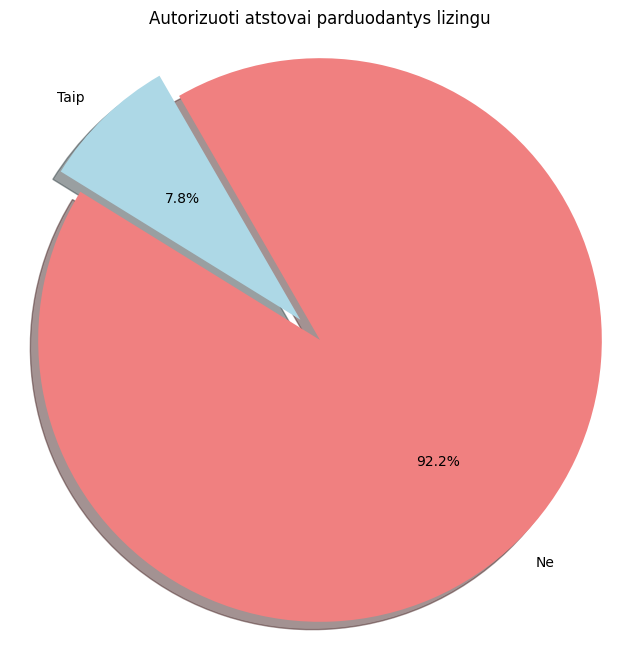

In [ ]:
at_auto = auto.copy()
at_auto['seller_type'] = at_auto['seller_type'].replace('Private person', 'Authorized Dealer')
atstovas_lizingas = at_auto[(at_auto['seller_type'] == 'Authorized Dealer') & (at_auto['leasing'] == 'Tak')]
sk_atstovas_lizingas = len(atstovas_lizingas)

labels = ['Taip', 'Ne']
sizes = [sk_atstovas_lizingas, len(auto) - sk_atstovas_lizingas]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal')
plt.title('Autorizuoti atstovai parduodantys lizingu')

plt.show()


# Iš grafikų matome, kad daugiausiai automobilių skelbimų yra įdėta privačių asmenų (kiek daugiau nei puse visų skelbimų). 14% visu skelbimų sudaro autorizuotų atstovybių skelbimai. Remiantis duomenimis, Lenkijoje lizingo paslauga nėra populiari arba skelbimai užpildyti netvarkingai.

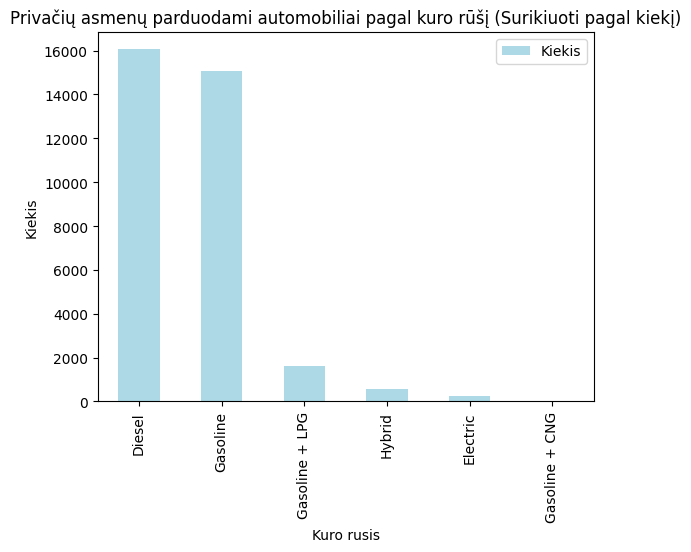

In [ ]:
privatus = auto[auto['seller_type'] == 'Private person']

grupuotas = privatus.groupby('fuel_type').size().reset_index(name='Kiekis')
grupuotas_rus = grupuotas.sort_values(by='Kiekis', ascending=False)

grupuotas_rus.plot(x='fuel_type', y='Kiekis', kind='bar', color='lightblue')
plt.xlabel('Kuro rusis')
plt.ylabel('Kiekis')
plt.title('Privačių asmenų parduodami automobiliai pagal kuro rūšį (Surikiuoti pagal kiekį)')

plt.show()


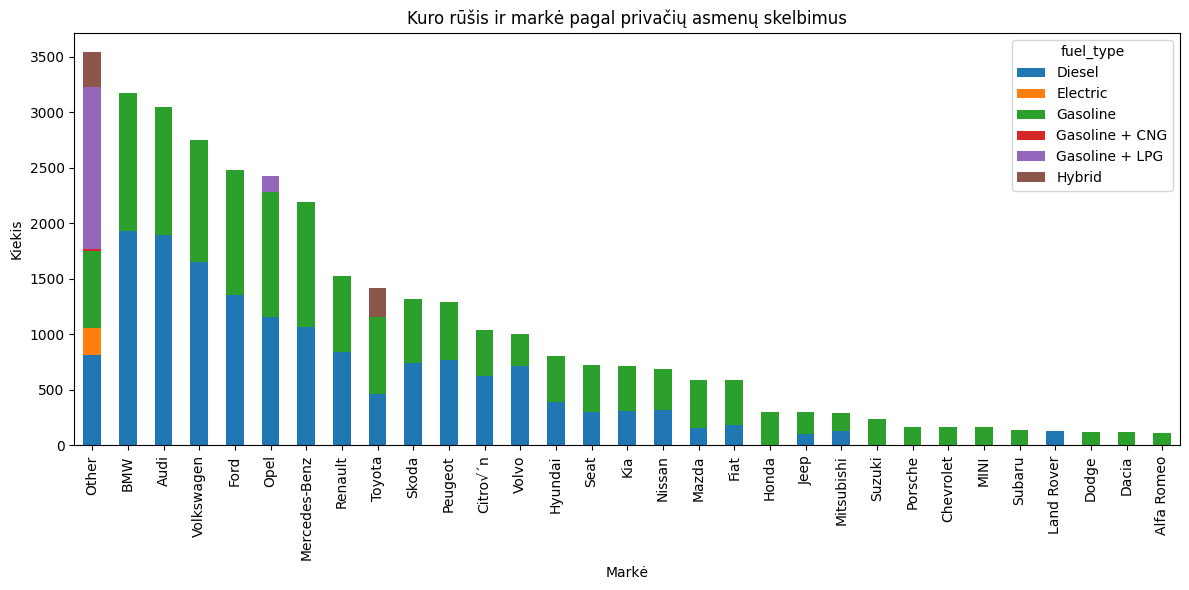

In [ ]:
privatus = auto[auto['seller_type'] == 'Private person']
sugrupuoti = privatus.groupby(['fuel_type', 'vehicle_brand']).size().reset_index(name='Kiekis')

def kategorizuotos_auto(row):
    if row['Kiekis'] < 100:
        return 'Other'
    else:
        return row['vehicle_brand']

sugrupuoti['kategorizuotos_auto'] = sugrupuoti.apply(kategorizuotos_auto, axis=1)
pivot_data = sugrupuoti.pivot_table(index='kategorizuotos_auto', columns='fuel_type', values='Kiekis', aggfunc='sum')
pivot_data.replace('Other', np.nan, inplace=True)
pivot_data = pivot_data.fillna(0)
pivot_data = pivot_data.loc[pivot_data.sum(axis=1).sort_values(ascending=False).index]

pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Markė')
plt.ylabel('Kiekis')
plt.title('Kuro rūšis ir markė pagal privačių asmenų skelbimus')
plt.tight_layout()
plt.show()


# Kokius automobilius daugiausiai parduoda kiekviena pardavėjų grupė

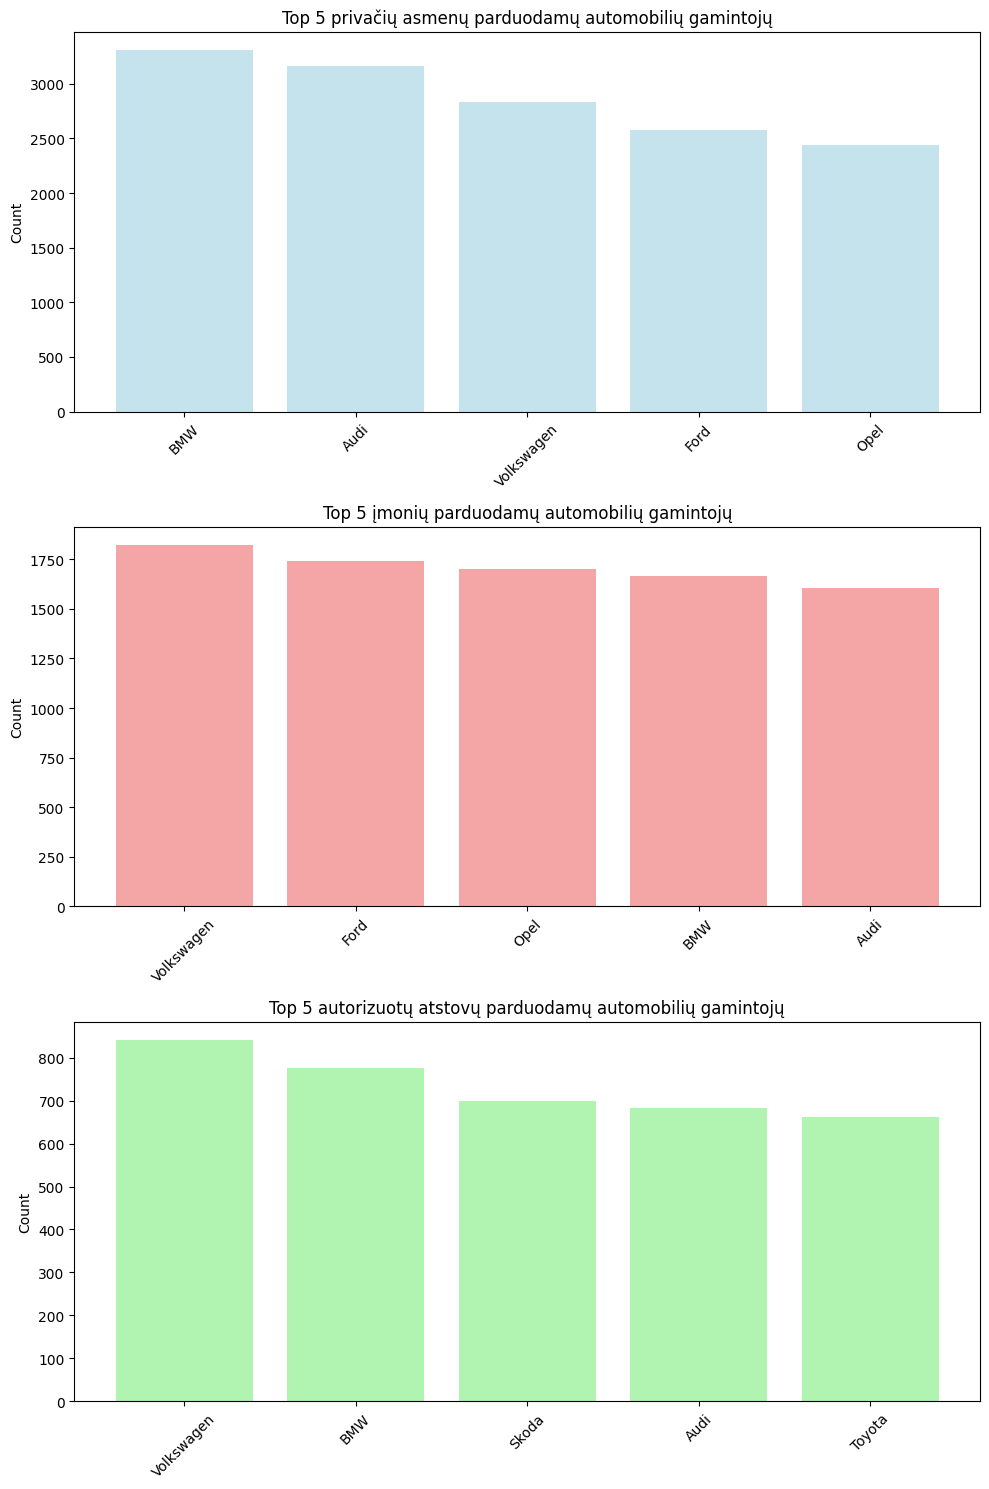

In [ ]:
private_person_data = auto[auto['seller_type'] == 'Private person']
dealer_data = auto[auto['seller_type'] == 'Dealer']
authorized_dealer_data = auto[auto['seller_type'] == 'Authorized Dealer']

def top_n_brands(data, n=5):
    return data['vehicle_brand'].value_counts().head(n)

top_privatus = top_n_brands(private_person_data)
top_imone = top_n_brands(dealer_data)
top_atstovas = top_n_brands(authorized_dealer_data)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].bar(top_privatus.index, top_privatus.values, color='lightblue', alpha=0.7)
axs[0].set_title('Top 5 privačių asmenų parduodamų automobilių gamintojų')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(top_imone.index, top_imone.values, color='lightcoral', alpha=0.7)
axs[1].set_title('Top 5 įmonių parduodamų automobilių gamintojų')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

axs[2].bar(top_atstovas.index, top_atstovas.values, color='lightgreen', alpha=0.7)
axs[2].set_title('Top 5 autorizuotų atstovų parduodamų automobilių gamintojų')
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
